In [1]:
import pandas as pd
import numpy as np

from plotnine import (
    ggplot,
    aes,
    geom_boxplot,
    geom_jitter,
    scale_x_discrete,
    coord_flip
)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### A box and whiskers plot

*The boxplot compactly displays the distribution of a continuous variable.*

Read more:
+ [wikipedia](https://en.wikipedia.org/wiki/Box_plot)
+ [ggplot2 docs](https://ggplot2.tidyverse.org/reference/geom_boxplot.html)


In [2]:
flights = pd.read_csv('data/flights.csv')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Basic boxplot

In [3]:
months = [month[:3] for month in flights.month[:12]]
print(months)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


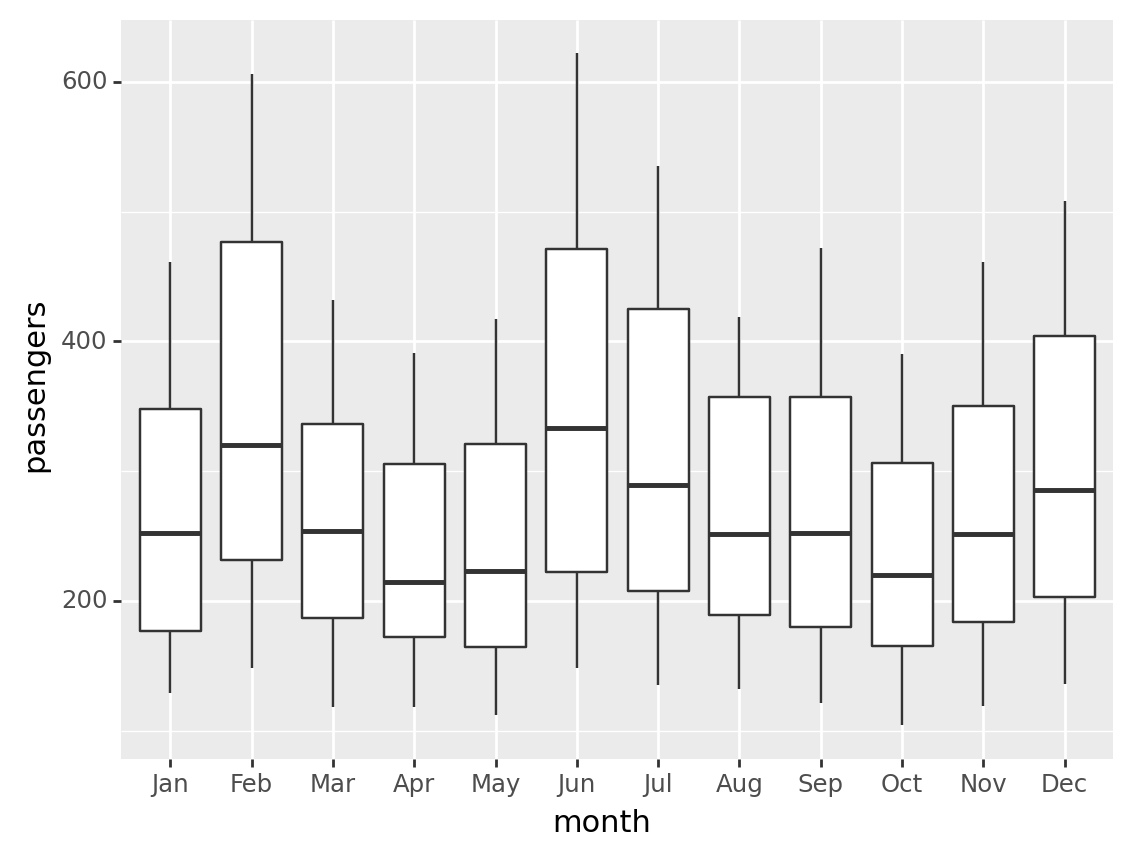

<ggplot: (333513792)>

In [4]:
(
    ggplot(flights) 
    + geom_boxplot(aes(x='factor(month)', y='passengers'))
    + scale_x_discrete(labels=months, name='month')  # change ticks labels on OX
)

Horizontal boxplot

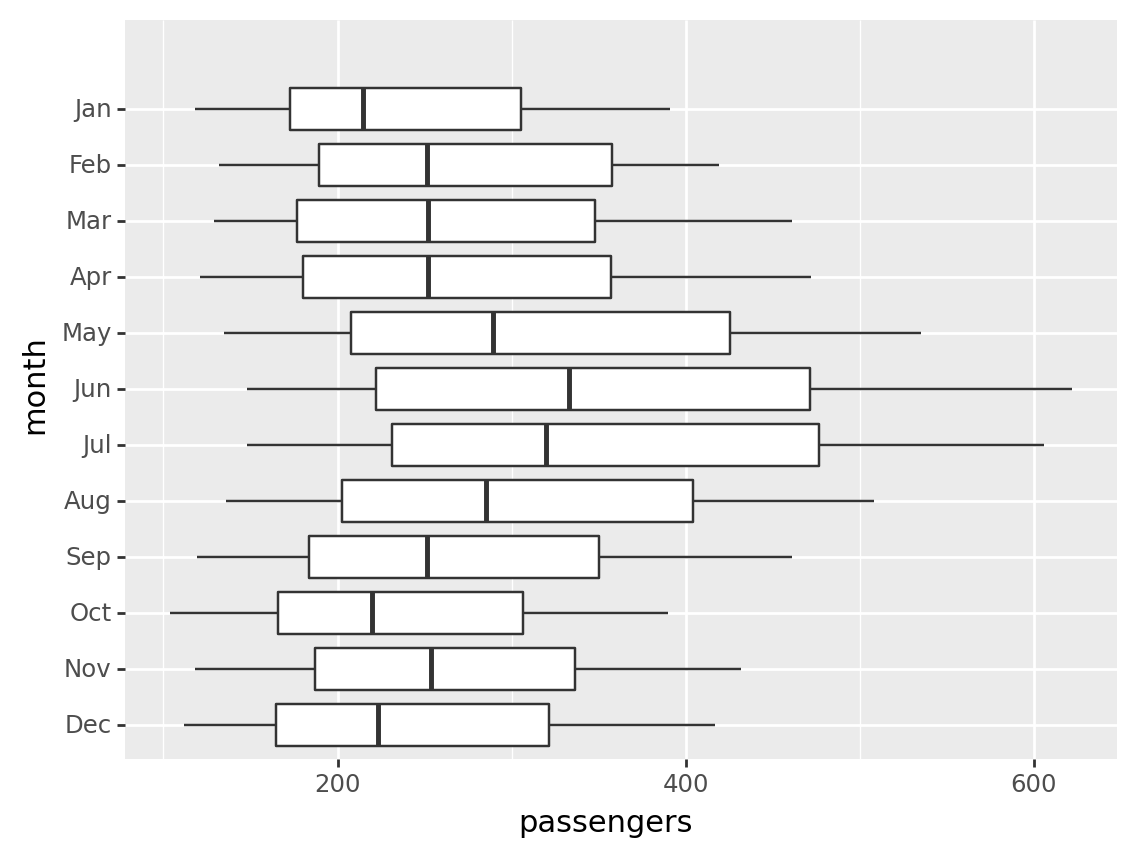

<ggplot: (333978546)>

In [5]:
(
    ggplot(flights) 
    + geom_boxplot(aes(x='factor(month)', y='passengers'))
    + coord_flip()
    + scale_x_discrete(
        labels=months[::-1], 
        limits=flights.month[12::-1],
        name='month',
    )
)

Boxplot with jittered points:

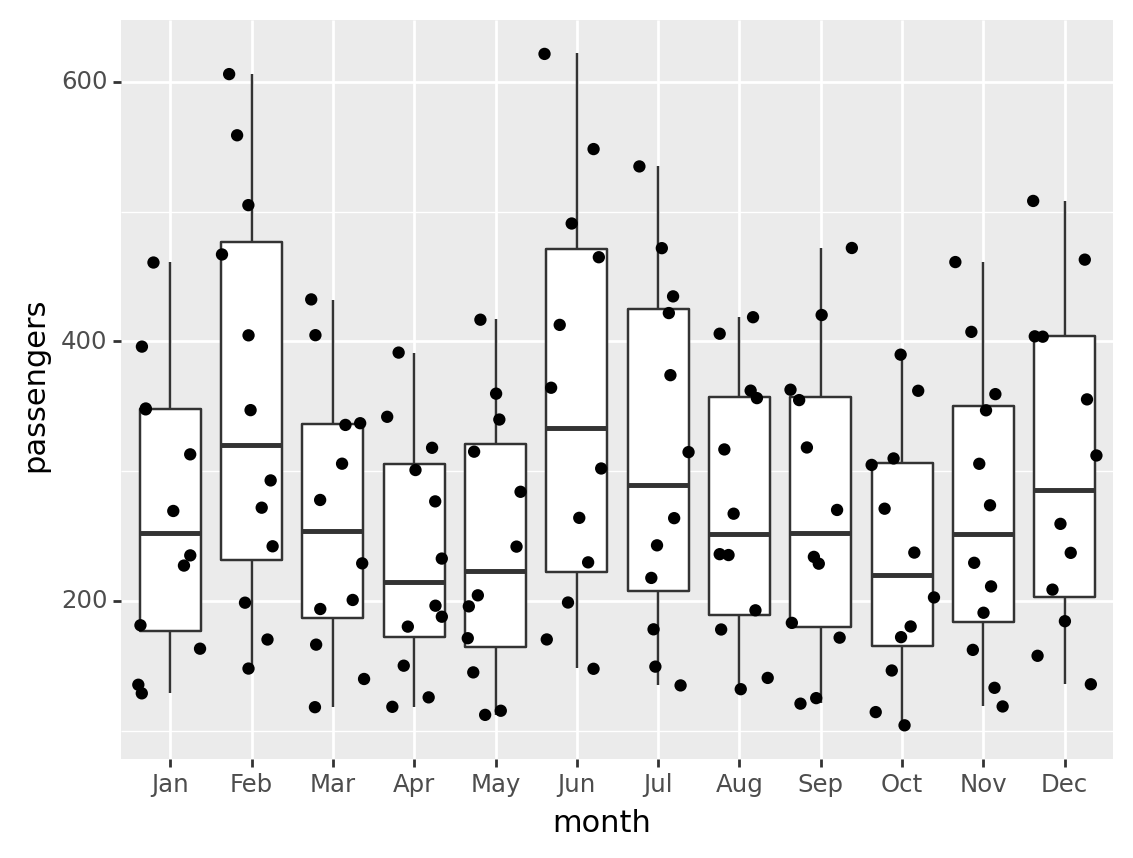

<ggplot: (335680287)>

In [6]:
(
    ggplot(flights, aes(x='factor(month)', y='passengers')) 
    + geom_boxplot()
    + geom_jitter()
    + scale_x_discrete(labels=months, name='month')  # change ticks labels on OX
)